<table style="width:100%;">
    <tr>
        <td style="width:80%; text-align:left; vertical-align: center;">
            <img src="./ETH_Logo.svg" alt="ETH logo" align="left" vspace="4">
        </td>
        <td style="width:20%; text-align:left; vertical-align: top;">
            Biochemical Engineering Lab<br/>
            Prof. Dr. P. Arosio<br/>
            <img src="./DCHAB_Logo.png" alt="DCHAB logo" align="left" vspace="-50"
             style="width:150px; margin: -12px 0px 0px -20px;">
        </td>
    </tr>
</table>

<center> 
    <h1>Biochemical and Polymer Reaction Engineering: Exercise 5</h1>
    <h3>by Eduard Meier</h3>
</center>

<center> 
<img src="./Header.jpg" alt="Polymers" style="width: 800px;"/>
</center>

This Jupyter Notebooks contains a presentation of the applied equations, all code (main script and various functions) used to solve the exercise as well as the resulting plots. It belongs to the course "Biochemical and Polymer Reaction Engineering", held by Prof. Arosio in the autumn semester 2022. References to equations inside the lecture script are indicated on the left side of the corresponding equations and refer to the equation number in the lecture script.

# 1 Equations and Derivations

## 1.1 Part a)

The formation of amyloid fibrils from a pool of monomeric proteins under conditions in which fragmentation is the main secondary nucleation process and assuming breakage with equal probability in each fibril bond, the corresponding PBE and the respective moments read:

\begin{align}
    (\mathrm{Ex}) \;\;\;\;\;\;  \frac{\mathrm{d}f_j}{\mathrm{d}t} &= 2 k_+ f_{j-1}m-2k_+ f_j m - k_- (j-1) f_j + 2 k_- \sum_{i=j+1}^\infty f_i + \delta_{j,n_C} k_n m^{n_C} \\
    (\mathrm{Ex}) \;\;\;\;\;\;  \mu_0 &= \sum_{j=n_C}^\infty f_j = P \\
    (\mathrm{Ex}) \;\;\;\;\;\; \mu_1 &= \sum_{j=n_C}^{\infty} j f_j = M \\
    (\mathrm{Ex}) \;\;\;\;\;\; \mu_2 &= \sum_{j=n_C}^{\infty} j^2 f_j
\end{align}

To arrive at ODEs for the moments, which can be numerically integrated, respective time derivatives of the average quantities (moments) listed above are computed:

\begin{align}
    \frac{\mathrm{d}\mu_0}{\mathrm{d}t} &= \sum_{j=n_C}^\infty \frac{\mathrm{d}f_j}{\mathrm{d}t} \\
    \frac{\mathrm{d}\mu_1}{\mathrm{d}t} &= \sum_{j=n_C}^\infty \left( \frac{\mathrm{d}j}{\mathrm{d}t}f_j + j \frac{\mathrm{d}f_j}{\mathrm{d}t} \right) = \sum_{j=n_C}^\infty j \frac{\mathrm{d}f_j}{\mathrm{d}t} \\
    \frac{\mathrm{d}\mu_2}{\mathrm{d}t} &= \sum_{j=n_C}^\infty \left( \frac{\mathrm{d}j^2}{\mathrm{d}t}f_j + j^2 \frac{\mathrm{d}f_j}{\mathrm{d}t} \right) = \sum_{j=n_C}^\infty j^2 \frac{\mathrm{d}f_j}{\mathrm{d}t}
\end{align}

In a subsequent step, the PBE above is inserted into the ODEs for the moments, which yields:

\begin{align}
    \frac{\mathrm{d}\mu_0}{\mathrm{d}t} &= \sum_{j=n_C}^\infty  \left(  2 k_+ f_{j-1}m-2k_+ f_j m - k_- (j-1) f_j + 2 k_- \sum_{i=j+1}^\infty f_i + \delta_{j,n_C} k_n m^{n_C} \right) \\
    &= 2 k_+ m \sum_{j=n_C}^\infty (f_{j-1}-f_j) - k_- \sum_{j=n_C}^\infty (j-1) f_j + 2k_- \sum_{j=n_C}^\infty \sum_{i=j+1}^\infty f_i + \sum_{j=n_C}^\infty \delta_{j,n_C} k_n m^{n_C} \\
    \frac{\mathrm{d}\mu_1}{\mathrm{d}t} &= \sum_{j=n_C}^\infty j \left(  2 k_+ f_{j-1}m-2k_+ f_j m - k_- (j-1) f_j + 2 k_- \sum_{i=j+1}^\infty f_i + \delta_{j,n_C} k_n m^{n_C} \right) \\
     &= 2 k_+ m  \sum_{j=n_C}^\infty j f_{j-1} - 2 k_+ m  \sum_{j=n_C}^\infty j f_j - k_-  \sum_{j=n_C}^\infty j(j-1)f_j + k_-  \sum_{j=n_C}^\infty j  \sum_{i=j+1}^\infty f_i +  \sum_{j=n_C}^\infty j \delta_{j,n_C} k_n m^{n_C} \\
    \frac{\mathrm{d}\mu_2}{\mathrm{d}t} &= \sum_{j=n_C}^\infty j^2 \left(  2 k_+ f_{j-1}m-2k_+ f_j m - k_- (j-1) f_j + 2 k_- \sum_{i=j+1}^\infty f_i + \delta_{j,n_C} k_n m^{n_C} \right) \\
    &= 2 k_+ m  \sum_{j=n_C}^\infty j^2 f_{j-1} - 2 k_+ m  \sum_{j=n_C}^\infty j^2 f_j - k_-  \sum_{j=n_C}^\infty j^2 (j-1) f_j + 2 k_-  \sum_{j=n_C}^\infty j^2  \sum_{i=j+1}^\infty f_i +  \sum_{j=n_C}^\infty j^2 \delta_{j,n_C} k_n m^{n_C}
\end{align}

Rewriting the equations making use of the hints given in the exercise sheet yields the following set of equations, which are now independent of the fibril concentrations:

\begin{align}
    \frac{\mathrm{d}\mu_0}{\mathrm{d}t} &= - k_- (\mu_1 - \mu_0) + 2 k_- (\mu_1 - n_C \mu_0) + k_n m^{n_C} \\
    \frac{\mathrm{d}\mu_1}{\mathrm{d}t} &= 2 k_+ m \mu_0 - k_- (\mu_2 - \mu_1) + 2 k_- \left( \frac{1}{2} \mu_2 - \frac{1}{2} \mu_1 - \frac{1}{2} \mu_0 (n_C + n_C^2) \right) + n_C k_n m^{n_C} \\
    \frac{\mathrm{d}\mu_2}{\mathrm{d}t} &= 2 k_+ m (2\mu_1 + \mu_0) - k_- (\mu_3 - \mu_2) + 2 k_- \left( \frac{1}{3} \mu_3 - \frac{1}{2} \mu_2 + \frac{1}{6} \mu_1 - \mu_0 \left( \frac{1}{3} n_C^3 + \frac{1}{2} n_C^2 + \frac{1}{6} n_C \right) \right) + n_C^2 k_n m^{n_C}
\end{align}

And the third moment can be calculated from the other moments according to:

\begin{equation}
    \mu_3 = \frac{\mu_2(2\mu_2\mu_0-\mu_1^2)}{\mu_1 \mu_0}
\end{equation}

Finally, to describe the evolution of the monomer concentration, we can make use of the following conservation equation:

\begin{align}
    m(t) &= m_0 - \sum_{j=n_C}^\infty j f_j \\
         &= m_0 - \mu_1 \\
\end{align}

\begin{equation}
       \implies \frac{\mathrm{d}m}{\mathrm{d}t} = - \frac{\mathrm{d}\mu_1}{\mathrm{d}t}
\end{equation}

By numerically integrating the derived system of 4 coupled ODEs, namely for the monomer concentration and the three moments, the time evolution can be simulated.

## 1.2 Part b)

The fibril length distribution can be calculated according to the following set of equations, assuming that it follows a gamma distribution:

\begin{align}
    (\mathrm{Ex}) \;\;\;\;\;\; g(\chi) &= \alpha (\alpha \chi)^{\beta-1} \frac{\mathrm{exp}(-\alpha \chi)}{\Gamma(\beta)} \\
    (\mathrm{Ex}) \;\;\;\;\;\; \alpha &= \frac{\mu_0 \mu_1}{\mu_2 \mu_0 - \mu_1^2} \\
    (\mathrm{Ex}) \;\;\;\;\;\; \beta &= \frac{\mu_1^2}{\mu_2\mu_0 - \mu_1^2}
\end{align}

## 1.3 Part c)

The average fibril length is calculated via

\begin{equation}
    \bar{j} = \frac{\mu_1}{\mu_0} \; .
\end{equation}

# 2. Plots and Discussion

## 2.1 Part a)

The results displayed in Fig. 1 are found when numerically solving the previously defined set of four ODEs assuming an initial fibril mass and number concentration of zero and an initial monomer concentration of 250 $\mu$M.
Thus, when starting without any fibrils, an initial lag phase of approximately 20 minutes is observed, where the total fibril mass does not change. This lag phase is followed by a rapid growth phase (of the fibrils) until most of the monomers have been incorporated. Full conversion of the monomers is achieved after approximately 1.3 hours.

<figure> 
    <center>
    <img src="./Plot_BPRE_Ex5_1.pdf" alt="Fibrils"  style="width: 450px;"/>
    <figcaption> Figure 1: Evolution of the total fibril mass concentration (M) over time, starting from an initial fibril mass concentration of zero. </figcaption>
    </center>
</figure>
<br>
</br>

## 2.2 Part b)

Both reduction of the elongation rate constant ($k_+$) as well as the fragmentation rate constant ($k_-$) result in increased lag times, slower growth and increased times to reach full monomer conversion, as shown in Fig. 2. On one side, the reduction of the fragmentation rate constant implies fewer fragmentation events, which means fewer reactive fibril ends which favor growth, thus the growth rate is reduced. On the other side, a decrease in the elongation rate constant leads to an even lower growth rate and higher lag times, since fewer aggregation events happen, which are a prerequisite for fibril growth. Thus, the time required to reach full monomer conversion is increased by both reduction of the elongation and of the fragmentation rate constants, while the effect of reducing the elongation rate constant is even higher, since it directly influences growth (and not indirectly as in the case of reducing the fragmentation rate constant).

<figure> 
    <center>
    <img src="./Plot_BPRE_Ex5_2.pdf" alt="Fibrils2"  style="width: 450px;"/>
    <figcaption> Figure 2: Evolution of the total fibril mass concentration (M) over time, starting from an initial fibril mass concentration of zero, setting different values for the elongation and fragmentation rate constants.  </figcaption>
    </center>
</figure>
<br>
</br>

The distributions of fibril lengths considering 90 % monomer conversion, varying the elongation and fragmentation rate constant, are shown in Fig. 3. Based on the results displayed in Fig. 3 combined with the experience that short fibrils are potentially more dangerous in neurodegenerative disorders, we can conclude that a decrease in the elongation rate constant, shifting the mean of the distribution to lower fibril lengths compared to the base case simulation, is especially dangerous, while a reduction of the fragmentation rate constant shifts the mean to higher fibril lengths. Therefore, as a strategy to inhibit aggregation, a reduction of the fragmentation rate constant is  a proising target, as both the mean fibril length is shifted to higher values and the aggregation rate is reduced, leading to a fewer amount of fibrils present at any point in time (relative to the base case).

<figure> 
    <center>
    <img src="./Plot_BPRE_Ex5_3.pdf" alt="Fibrils3"  style="width: 450px;"/>
    <figcaption> Figure 3: Fibril length distribution, setting different values for the elongation and fragmentation rate constants.  </figcaption>
    </center>
</figure>
<br>
</br>

## 2.3 Part c)

In this task, the effect of the presence of preformed fibrils (so-called "seeds") on the fibril growth dynamics was considered by varying the initial fibril mass concentration ($M_0$) between 2.5e-7 $\mu$M and 25 $\mu$M. In addition, the initial fibril length of the seeds was assumed to be 1000 (i.e. 1000 monomers are incorporated), and thus $P_0 = M_0/1000$. 

The time evolution of the total fibril mass concentration for the considered initial values is displayed in Fig. 4. As can be seen, fibril growth (and thus monomer depletion) starts earlier for higher initial fibril mass concentrations, which seems reasonable since with present seeds, more monomers can directly be incorporated and the lag phase is reduced and growth is favored. In addition, the asymptote reached after full monomer conversion also increases with increasing initial fibril mass concentrations, since more fibrils are present in the system.

<figure> 
    <center>
    <img src="./Plot_BPRE_Ex5_4.pdf" alt="Fibrils4"  style="width: 450px;"/>
    <figcaption> Figure 4: Time evolution of the total fibril mass concentration for different initial fibril mass concentrations. </figcaption>
    </center>
</figure>
<br>
</br>

The time necessary to incorporate 50 % of the initially present monomer (i.e. the half time) into fibrils decreases with increasing amount of initial fibril mass concentration is displayed in Fig. 5. These results agree with the findings from Fig. 4 that at each point in time, monomer conversion is increased for increasing initial fibril mass concentration and thus the half time is reduced. However, no effect is observed for very low initial fibril mass concentrations, where the half time is approximately constant. Therefore, it can be assumed that at very low initial fibril mass concentrations, the rate of monomer consumption is dominated by primary nucleation, which does not depend on the fibril concentration.

<figure> 
    <center>
    <img src="./Plot_BPRE_Ex5_5.pdf" alt="Fibrils5"  style="width: 450px;"/>
    <figcaption> Figure 5: Half time of the monomer concentration for the considered initial fibril mass concentrations.  </figcaption>
    </center>
</figure>
<br>
</br>

As displayed in Fig. 6, at a monomer conversion of 90 % the average fibril length remains roughly constant for low initial fibril mass concentrations ($M_0$), while it sharply rises above a value 1 $\mu$M. The stagnation of the average fibril length at low $M_0$ means that either the present fibril seeds don't affect the growth process significantly or that the increase in growth is compensated by a simultaneous increase in fragmentation. Above a critical initial seed concentration, the fibril growth is significant and the relative share of primary nucleation events (leading to lower average fibril lengths) decreases.

<figure> 
    <center>
    <img src="./Plot_BPRE_Ex5_6.pdf" alt="Fibrils6"  style="width: 450px;"/>
    <figcaption> Figure 6: Average fibril length at 90 % monomer conversion for the considered initial fibril mass concentrations. </figcaption>
    </center>
</figure>
<br>
</br>

The temporal evolution of the average fibril length is shown in Fig. 7 for different initial fibril mass concentrations. While the shape of the observed curves is similar on a qualitative level, higher initial fibril mass concentrations lead to faster dynamics and thus faster monomer uptake. In general, in a first stage, growth dominates, leading to a strong increase in the average fibril length, and eventually fragmentation takes over, thus a maximum length is passed and eventually the average length reaches a horizontal asymptote.

<figure> 
    <center>
    <img src="./Plot_BPRE_Ex5_7.pdf" alt="Fibrils7"  style="width: 450px;"/>
    <figcaption> Figure 7: Temporal evolution of the average fibril length for the considered initial fibril mass concentrations. </figcaption>
    </center>
</figure>

<br>
</br>

The fibril length distribution at 90 % conversion is displayed in Fig. 8 for different initial fibril mass concentrations. As can easily be seen, the distribution is largely unaffected by the seeding, as the curves mostly coincide and can hardly be distinguished.

<figure> 
    <center>
    <img src="./Plot_BPRE_Ex5_8.pdf" alt="Fibrils8"  style="width: 450px;"/>
    <figcaption> Figure 8: Fibril length distribution at 90 % monomer conversion. </figcaption>
    </center>
</figure>

<br>
</br>

# Python Code

Import of the relevant libraries.

In [1]:
# Import libraries and other preliminaries

import numpy as np                    # Import numerical python library
import matplotlib as mpl              # Import python mathematical plotting library
import matplotlib.pyplot as plt       # Import python mathematical plotting library
from scipy.integrate import solve_ivp # Import solver for (system of coupled) ODEs
from scipy.special import gamma, factorial # Import gamma function
import math

# Use LaTeX font in plots:
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computern Modern Roman'],
})

## Part a)

In [2]:
def mu3(mu_0, mu_1, mu_2):
    """
    Calculate third-order moment based on the above equation.
    """ 
    return mu_2*(2*mu_2*mu_0-mu_1**2)/(mu_1*mu_0)

In [3]:
def ode_system(t, y, k_min, k_plus, k_n, n_C):
    """
    Define the system of ODEs for the time evolution of the fibrils
    """
    mu_0, mu_1, mu_2, m = y
    
    # Calculate 3rd-order moment
    mu_3 = mu3(mu_0, mu_1, mu_2)
    
    
    dmu0_dt = - k_min*(mu_1-mu_0) + 2*k_min*(mu_1-n_C*mu_0) + k_n*m**n_C
    dmu1_dt = 2*k_plus*m*mu_0 - k_min*(mu_2-mu_1) + 2*k_min*(0.5*mu_2-0.5*mu_1-0.5*mu_0*(n_C+n_C**2)) + n_C*k_n*m**n_C
    dmu2_dt = 2*k_plus*m*(2*mu_1+mu_0) - k_min*(mu_3-mu_2) + 2*k_min*(1/3*mu_3-0.5*mu_2+1/6*mu_1-mu_0*(1/3*n_C**3+0.5*n_C**2+1/6*n_C)) + n_C**2*k_n*m**n_C
    dm_dt = - dmu1_dt
    
    odesys = [dmu0_dt, dmu1_dt, dmu2_dt, dm_dt]
    
    return odesys

In [4]:
def solve_ode_system(Param):
    """
    Solve the system of ODEs
    """
    # Read-out parameters and initial conditions
    tMin = Param[0]
    tMax = Param[1]
    tStep = Param[2]
    k_min = Param[3]
    k_plus = Param[4]
    k_n = Param[5]
    n_C = Param[6]
    mu_00 = Param[7]
    mu_10 = Param[8]
    mu_20 = Param[9]
    m0 = Param[10]

    # Define initial condition vector
    y0 = [mu_00, mu_10, mu_20, m0]

    # Define time limits
    tlimits = [tMin, tMax]
    trange = np.arange(tMin, tMax+tStep, tStep)

    # Define additional ODE parameters
    Param_ODE = [k_min, k_plus, k_n, n_C]

    # Solve system of ODEs (use Runge-Kutta 4-5th order for numerical integration)
    Sol= solve_ivp(ode_system, tlimits, y0, args=Param_ODE, method='RK45', t_eval=trange)
    mu_0 = Sol.y[0]
    mu_1 = Sol.y[1]
    mu_2 = Sol.y[2]
    m = Sol.y[3]
    t = Sol.t

    return mu_0, mu_1, mu_2, m, t    

In [5]:
def TaskA():
    """
    Solve and plot the system of ODEs
    """
    # Define parameters
    k_min = 1e-6       # Rate constant for fragmentation (minus) [1/s]
    k_plus = 1e4       # Rate constant for elongation (plus) [1/M/s]
    k_n = 1e-6         # Rate constant (n) [1/M/s]
    n_C = 2            # Additional parameter (n_C) [-]
    
    # Define time steps and limits for ODE integration
    tMin = 0           # Start time [s]
    tMax = 2*3600      # Maximal time [s]
    tStep = 1          # Time step size [s]
    
    # Define initial condition
    m0 = 250e-6           # Initial monomer concentration [M]
    mu_00 = 1e-12          # Initial 0th-order moment [M]
    mu_10 = 1e-12          # Initial 1th-order moment [M]
    mu_20 = 1e-12          # Initial 2th-order moment [M]

    # Parameter array
    Param = [tMin, tMax, tStep, k_min, k_plus, k_n, n_C, mu_00, mu_10, mu_20, m0]
    
    # Create and solve system of ODEs
    mu_0, mu_1, mu_2, m, t  = solve_ode_system(Param)
     
    # Plot figure
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (6,5)) # Create figure with one plot
    
    plot1 = axs.plot(t/3600, mu_1*1e6, color='black')      # Create plot of mu_1 [mumol/L] vs. t [h]
    axs.set_xlabel('Time, $t$ [h]')   # Add x-axis label to plot
    axs.set_ylabel(r'Total Fibril Mass, $M$ [$\mu$M]')  # Add y-axis label to plot

    # Title
    fig.suptitle('Time Evolution of the Total Fibril Mass', fontsize=16, y=0.98)   # Set overall title
        
    # Save plot
    filename = 'Plot_BPRE_Ex5_1'
    plt.savefig(filename+'.pdf', bbox_inches='tight')      

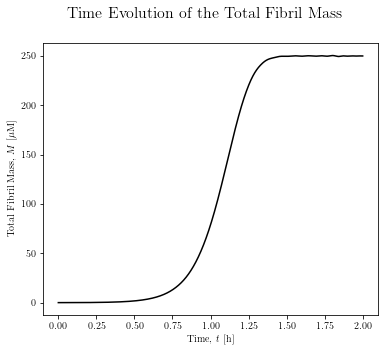

In [6]:
# Execute function for task a)
TaskA()

## Part b)

In [7]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

In [8]:
def gamma_dist(chi, alpha, beta):
    return alpha*(alpha*chi)**(beta-1)*np.exp(-alpha*chi)/gamma(beta)

In [9]:
def alpha_dist(mu_0, mu_1, mu_2):
    return mu_0*mu_1/(mu_2*mu_0-mu_1**2)

In [10]:
def beta_dist(mu_0, mu_1, mu_2):
    return mu_1**2/(mu_2*mu_0-mu_1**2)

In [11]:
def TaskB():
    """
    Solve and plot the system of ODEs, Task b)
    """
    # Define parameters
    k_min = 1e-6        # Rate constant for fragmentation (minus) [1/s]
    k_plus = 1e4        # Rate constant for elongation (plus) [1/M/s]
    k_min1 = 1e-6       # Rate constant (minus) [1/s]
    k_plus1 = 1e4/10    # Rate constant (plus) [1/M/s]
    k_min2 = 1e-6/10    # Rate constant (minus) [1/s]
    k_plus2 = 1e4       # Rate constant (plus) [1/M/s]
    k_n = 1e-6          # Rate constant (n) [1/M/s]
    n_C = 2             # Additional parameter (n_C) [-]
    
    # Define time steps and limits for ODE integration
    tMin = 0           # Start time [s]
    tMax = 6*3600      # Maximal time [s]
    tStep = 1          # Time step size [s]
    
    # Define initial condition
    m0 = 250e-6           # Initial monomer concentration [M]
    mu_00 = 1e-12          # Initial 0th-order moment [M]
    mu_10 = 1e-12          # Initial 1th-order moment [M]
    mu_20 = 1e-12          # Initial 2th-order moment [M]

    # Parameter array
    Param  = [tMin, tMax, tStep, k_min,  k_plus,  k_n, n_C, mu_00, mu_10, mu_20, m0]
    Param1 = [tMin, tMax, tStep, k_min1, k_plus1, k_n, n_C, mu_00, mu_10, mu_20, m0]
    Param2 = [tMin, tMax, tStep, k_min2, k_plus2, k_n, n_C, mu_00, mu_10, mu_20, m0]

    # Create and solve system of ODEs
    mu_0, mu_1, mu_2, m, t  = solve_ode_system(Param)
    mu_01, mu_11, mu_21, m1, t1  = solve_ode_system(Param1)
    mu_02, mu_12, mu_22, m2, t2  = solve_ode_system(Param2)
    
    # Define conversion to consider in the following
    X_ideal = 0.9
    
    # Calculate conversion
    X_m = (m[0]-m)/m[0]
    X_m1 = (m1[0]-m1)/m1[0]
    X_m2 = (m2[0]-m2)/m2[0]
    
    # Define array of fibril lengths
    chi = np.arange(1, 8e3, 1)    
    
    # Find index of solution arrays, where conversion is closest to 90 %
    idx, value = find_nearest(X_m, X_ideal)
    idx1, value1 = find_nearest(X_m1, X_ideal)
    idx2, value2 = find_nearest(X_m2, X_ideal)
    
    # Find entries in solution arrays corresponding to X_ideal
    mu_0X = mu_0[idx]
    mu_1X = mu_1[idx]
    mu_2X = mu_2[idx]
    m_X = m[idx]
    
    mu_0X1 = mu_01[idx1]
    mu_1X1 = mu_11[idx1]
    mu_2X1 = mu_21[idx1]
    m_X1 = m1[idx1]

    mu_0X2 = mu_02[idx2]
    mu_1X2 = mu_12[idx2]
    mu_2X2 = mu_22[idx2]
    m_X2 = m2[idx2]

    # Calculate fibril length distribution
    alpha = alpha_dist(mu_0X, mu_1X, mu_2X)
    beta = beta_dist(mu_0X, mu_1X, mu_2X)
    g = gamma_dist(chi, alpha, beta)
    
    alpha1 = alpha_dist(mu_0X1, mu_1X1, mu_2X1)
    beta1 = beta_dist(mu_0X1, mu_1X1, mu_2X1)
    g1 = gamma_dist(chi, alpha1, beta1)
    
    alpha2 = alpha_dist(mu_0X2, mu_1X2, mu_2X2)
    beta2 = beta_dist(mu_0X2, mu_1X2, mu_2X2)
    g2 = gamma_dist(chi, alpha2, beta2)   
        
    
    # Plot figure
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (6,5)) # Create figure with one plot
    
    plot1 = axs.plot(t/3600, mu_1*1e6, color='black', label='Original')      # Create plot of mu_1 [mumol/L] vs. t [h]
    plot2 = axs.plot(t/3600, mu_11*1e6, color='blue', label=r'k$_+$/10')      # Create plot of mu_11 [mumol/L] vs. t [h]
    plot3 = axs.plot(t/3600, mu_12*1e6, color='red',  label=r'k$_-$/10')      # Create plot of mu_12 [mumol/L] vs. t [h]

    axs.set_xlabel('Time, $t$ [h]')   # Add x-axis label to plot
    axs.set_ylabel(r'Total Fibril Mass, $M$ [$\mu$M]')  # Add y-axis label to plot

    # Legend
    axs.legend()
    
    # Title
    fig.suptitle('Time Evolution of the Total Fibril Mass \n Considering Altered Rate Constants', fontsize=16, y=0.98)   # Set overall title
        
    # Save plot
    filename = 'Plot_BPRE_Ex5_2'
    plt.savefig(filename+'.pdf', bbox_inches='tight')      
    
    
    # Plot figure
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (6,5)) # Create figure with one plot
    
    plot1 = axs.plot(chi, g*1e2, color='black', label='Original')      # Create plot of distro vs. fibril length
    plot2 = axs.plot(chi, g1*1e2, color='blue', label=r'k$_+$/10')    # Create plot of distro vs. fibril length
    plot3 = axs.plot(chi, g2*1e2, color='red', label=r'k$_-$/10')    # Create plot of distro vs. fibril length
    
    axs.set_xlabel('Fibril Length, $j$ [-]')   # Add x-axis label to plot
    axs.set_ylabel(r'Probability [$\%$]')    # Add y-axis label to plot

    # Legend
    axs.legend()
    
    # Title
    fig.suptitle('Fibril Length Distribution for \n Monomer Conversion of 90 $\%$', fontsize=16, y=0.98)   # Set overall title
        
    # Save plot
    filename = 'Plot_BPRE_Ex5_3'
    plt.savefig(filename+'.pdf', bbox_inches='tight')   

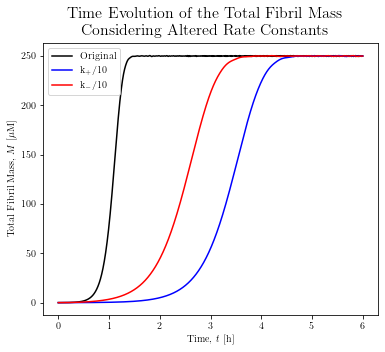

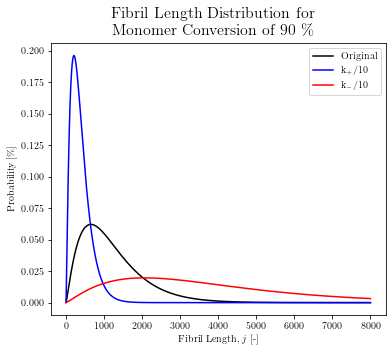

In [12]:
# Execute function for task b)
TaskB()

## Part c)

In [13]:
def TaskC(M_0, chi):
    """
    Solve and plot the system of ODEs, Task c)
    """
    # Read out input variables
    mu_10 = M_0
    mu_00 = M_0/1000
    
    # Define parameters
    k_min = 1e-6        # Rate constant for fragmentation (minus) [1/s]
    k_plus = 1e4        # Rate constant for elongation (plus) [1/M/s]
    k_n = 1e-6          # Rate constant (n) [1/M/s]
    n_C = 2             # Additional parameter (n_C) [-]
    
    # Define initial condition
    m0 = 250e-6           # Initial monomer concentration [M]
    mu_20 = 1e-12          # Initial 2th-order moment [M]

    # Parameter array
    Param  = [tMin, tMax, tStep, k_min,  k_plus,  k_n, n_C, mu_00, mu_10, mu_20, m0]

    # Create and solve system of ODEs
    mu_0, mu_1, mu_2, m, t  = solve_ode_system(Param)
    
    # Calculate avg. fibril length array
    len_avg = np.divide(mu_1, mu_0)
    
    # Define conversion to consider in the following
    X_ideal = 0.9
    
    # Calculate conversion
    X_m = (m[0]-m)/m[0]
    
    # Calculate division of current monomer conc. by initial monomer conc.
    m_m0 = m/m[0]
    
    # Find index of half conc.
    idx_half, value_half = find_nearest(m_m0, 0.5)
    
    # Find half time
    t_half = t[idx_half]   
    
    # Find index of solution arrays, where conversion is closest to 90 %
    idx, value = find_nearest(X_m, X_ideal)
    
    # Find entries in solution arrays corresponding to X_ideal
    mu_0X = mu_0[idx]
    mu_1X = mu_1[idx]
    mu_2X = mu_2[idx]
    m_X = m[idx]
    
    # Calculate avg. fibril length at 90% converision
    len_avgX = len_avg[idx]

    # Calculate fibril length distribution
    alpha = alpha_dist(mu_0X, mu_1X, mu_2X)
    beta = beta_dist(mu_0X, mu_1X, mu_2X)
    g = gamma_dist(chi, alpha, beta) 
    
    return mu_1, t_half, g, len_avg, len_avgX

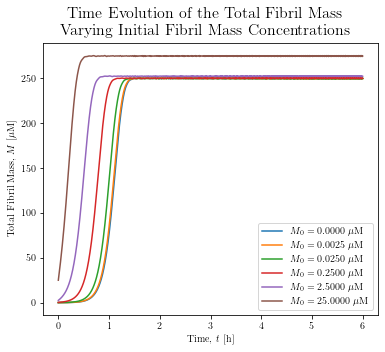

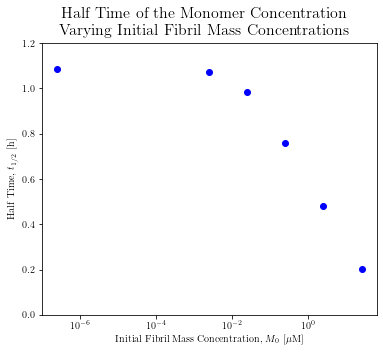

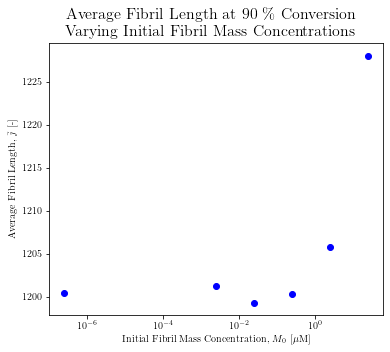

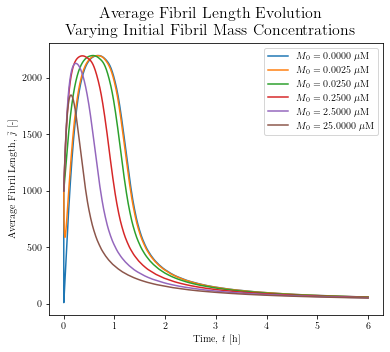

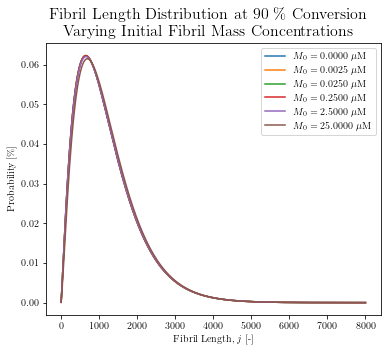

In [14]:
# Execute function for task c)

# Define time limits
tMin = 0           # Start time [s]
tMax = 6*3600      # Maximal time [s]
tStep = 1          # Time step size [s]

# Define limits for initial fibril mass concentrations
M0Min = 2.5*1e-13      # Initial fibril mass conc. [M]
M0Max = 25e-6
N_Steps = 5        # Number of steps  

# Define array of times
trange = np.arange(tMin, tMax+tStep, tStep)

# Define array of initial fibril mass concentrations
M0range = np.array([0.00000025, 0.0025, 0.025, 0.25, 2.5, 25])*1e-6

# Define array of fibril lengths
chi = np.arange(1, 8e3, 1) 

# Initialize empty arrays for storing the results
mu_1 = np.zeros((len(M0range), len(trange)))
t_half = np.zeros(len(M0range))
g = np.zeros((len(M0range), len(chi)))
len_avg = np.zeros((len(M0range), len(trange)))
len_avgX = np.zeros(len(M0range))
    
# Loop over all M0 values
for M0idx, M0 in enumerate(M0range):
    
    var1,var2,var3,var4,var5 = TaskC(M0, chi)
    
    mu_1[M0idx, :] = var1
    t_half[M0idx] = var2
    g[M0idx, :] = var3
    len_avg[M0idx, :] = var4
    len_avgX[M0idx] = var5
    
    
# Plot figure
fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (6,5)) # Create figure with one plot

for M0idx, M0 in enumerate(M0range):

    plot = axs.plot(trange/3600, mu_1[M0idx, :]*1e6, label=r'$M_0 = {:.4f}$ $\mu$M'.format(M0range[M0idx]*1e6))      # Create plot of mu_1 vs. time

axs.set_xlabel('Time, $t$ [h]')   # Add x-axis label to plot
axs.set_ylabel(r'Total Fibril Mass, $M$ [$\mu$M]')  # Add y-axis label to plot

# Legend
axs.legend()

# Title
fig.suptitle('Time Evolution of the Total Fibril Mass \n Varying Initial Fibril Mass Concentrations', fontsize=16, y=0.98)   # Set overall title

# Save plot
filename = 'Plot_BPRE_Ex5_4'
plt.savefig(filename+'.pdf', bbox_inches='tight')


# Plot figure
fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (6,5)) # Create figure with one plot

plot = axs.semilogx(M0range*1e6, t_half/3600, 'ob')      # Create plot of halftime vs. initial fibril mass conc.

axs.set_xlabel('Initial Fibril Mass Concentration, $M_0$ [$\mu$M]')   # Add x-axis label to plot
axs.set_ylabel(r'Half Time, $t_{1/2}$ [h]')  # Add y-axis label to plot

# Limits
axs.set_ylim([0, 1.2])

# Title
fig.suptitle('Half Time of the Monomer Concentration \n Varying Initial Fibril Mass Concentrations', fontsize=16, y=0.98)   # Set overall title

# Save plot
filename = 'Plot_BPRE_Ex5_5'
plt.savefig(filename+'.pdf', bbox_inches='tight') 


# Plot figure
fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (6,5)) # Create figure with one plot

plot = axs.semilogx(M0range*1e6, len_avgX, 'ob')      # Create plot of halftime vs. initial fibril mass conc.

axs.set_xlabel('Initial Fibril Mass Concentration, $M_0$ [$\mu$M]')   # Add x-axis label to plot
axs.set_ylabel(r'Average Fibril Length, $\bar{j}$ [-]')  # Add y-axis label to plot

# Title
fig.suptitle('Average Fibril Length at 90 $\%$ Conversion \n Varying Initial Fibril Mass Concentrations', fontsize=16, y=0.98)   # Set overall title

# Save plot
filename = 'Plot_BPRE_Ex5_6'
plt.savefig(filename+'.pdf', bbox_inches='tight') 


# Plot figure
fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (6,5)) # Create figure with one plot

for M0idx, M0 in enumerate(M0range):

    plot = axs.plot(trange/3600, len_avg[M0idx, :], label=r'$M_0 = {:.4f}$ $\mu$M'.format(M0range[M0idx]*1e6))      # Create plot of mu_1 vs. time

axs.set_xlabel('Time, $t$ [h]')   # Add x-axis label to plot
axs.set_ylabel(r'Average Fibril Length, $\bar{j}$ [-]')  # Add y-axis label to plot

# Legend
axs.legend()

# Title
fig.suptitle('Average Fibril Length Evolution \n Varying Initial Fibril Mass Concentrations', fontsize=16, y=0.98)   # Set overall title

# Save plot
filename = 'Plot_BPRE_Ex5_7'
plt.savefig(filename+'.pdf', bbox_inches='tight')


# Plot figure
fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (6,5)) # Create figure with one plot

for M0idx, M0 in enumerate(M0range):

    plot = axs.plot(chi, g[M0idx, :]*1e2, label=r'$M_0 = {:.4f}$ $\mu$M'.format(M0range[M0idx]*1e6))      # Create plot of mu_1 vs. time

axs.set_xlabel('Fibril Length, $j$ [-]')   # Add x-axis label to plot
axs.set_ylabel(r'Probability [$\%$]')  # Add y-axis label to plot

# Legend
axs.legend()

# Title
fig.suptitle('Fibril Length Distribution at 90 $\%$ Conversion \n Varying Initial Fibril Mass Concentrations', fontsize=16, y=0.98)   # Set overall title

# Save plot
filename = 'Plot_BPRE_Ex5_8'
plt.savefig(filename+'.pdf', bbox_inches='tight')